## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [1742]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [1743]:
cp_aptos = pd.read_csv("aptos.csv")
cp_aptos.head(15)




,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: O tamanho do apartamento em m².
-   Valor: Valor do apartamento em R$.
-   Quartos: Quantos quartos tem no apartamento.
-   Vagas: Quantas vagas de garagem tem em cada apartamento.
-   Reformado: Indica se o apartamento foi reformado ou não (0 ou 1).
-   Bairro: O bairro em que o apartamento se localiza.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Eu acho que o preço do apartamento aumenta conforme sua área em m².
2.  Eu acho que o preço do apartamento aumenta conforme a quantidade de vagas disponíveis em sua garagem.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [1744]:
cp_aptos2 = cp_aptos[['metros','valor', 'vagas']] 

cp_aptos2.head()


,metros,valor,vagas
0,107,560,2
1,107,555,2
2,49,196,1
3,104,515,2
4,92,560,2


c:\users\nicolas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\nicolas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


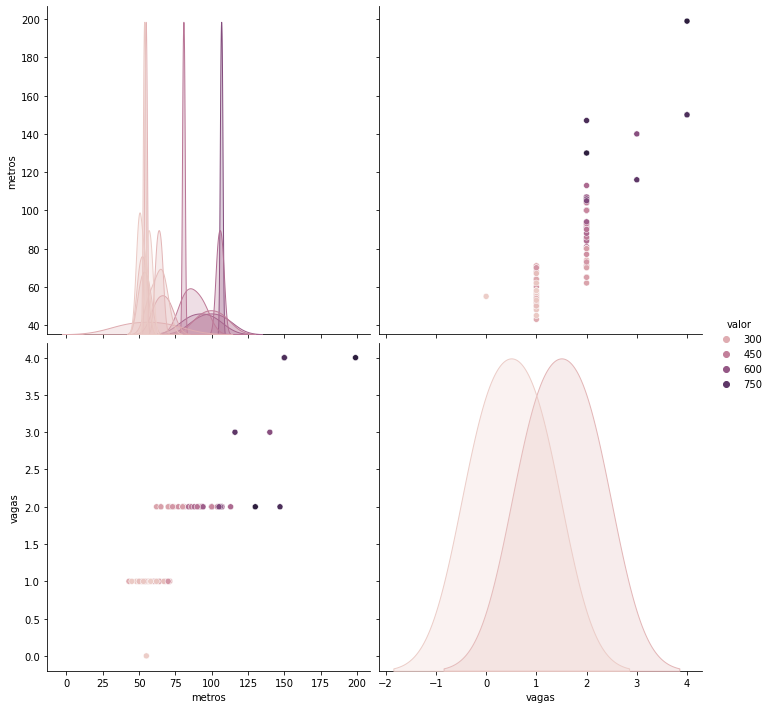

In [1745]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(cp_aptos2, hue='valor', height=5)
plt.show()



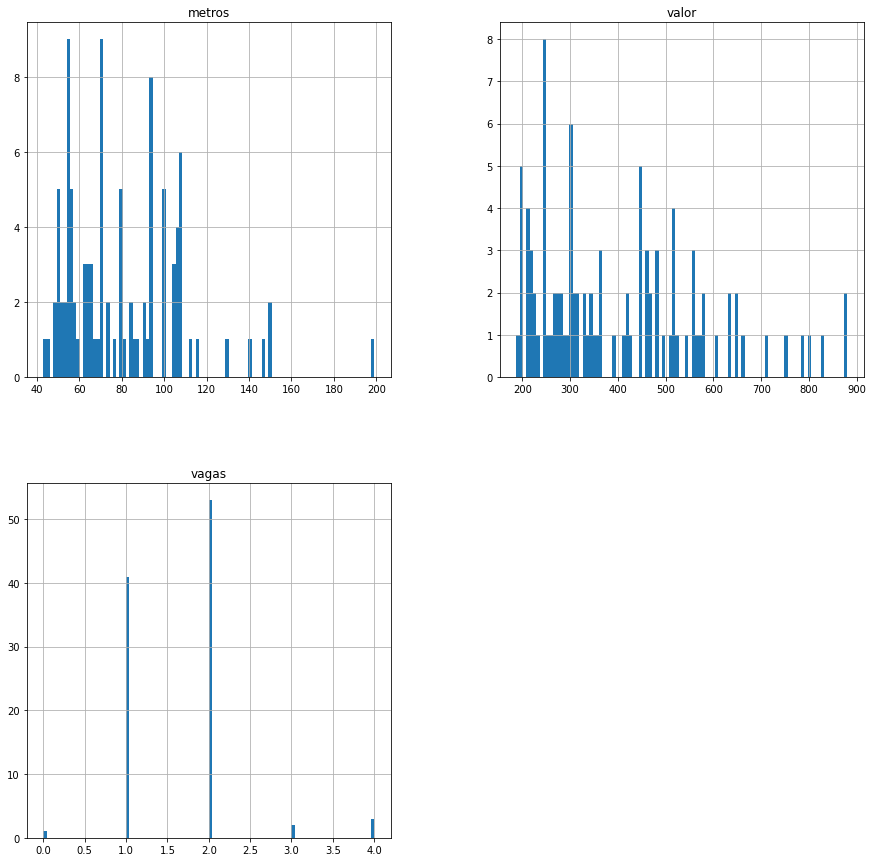

In [1746]:
cp_aptos2.hist(bins=100, figsize=(15, 15))
plt.show()

<AxesSubplot:xlabel='metros', ylabel='valor'>

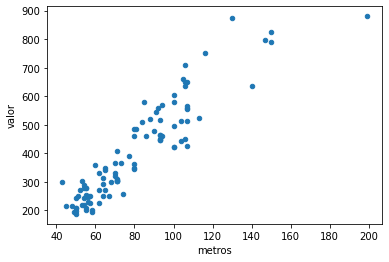

In [1747]:
cp_aptos.plot.scatter('metros', 'valor')

<AxesSubplot:xlabel='vagas', ylabel='valor'>

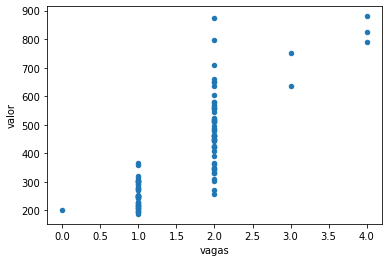

In [1748]:
cp_aptos.plot.scatter('vagas', 'valor')

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

In [1749]:
No geral os valores analisados parecem não ser tão extremos um do outro, então acredito que não existem valores outliers a serem tratados.

SyntaxError: invalid syntax (Temp/ipykernel_18188/3242720.py, line 1)

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. Regressão Linear 
2. KNN

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. A análise de regressão linear é usada para prever o valor de uma variável com base no valor de outra. 
A variável que deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente.

2. O KNN (K-Nearest Neighbor) é um algoritmo que pode ser usado tanto para classificação como regressão.
Seu objetivo é determinar a qual grupo uma determinada amostra vai pertencer com base nas amostras vizinhas.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [1750]:
X = cp_aptos[['metros', 'quartos', 'vagas', 'reformado']]
Y = cp_aptos[['valor']]


In [1751]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)



Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [1752]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()

lin_model.fit(X_treino, Y_treino)

LinearRegression()

In [1753]:
y_teste_predito = lin_model.predict(X_teste)

Text(0, 0.5, 'Valor Predito')

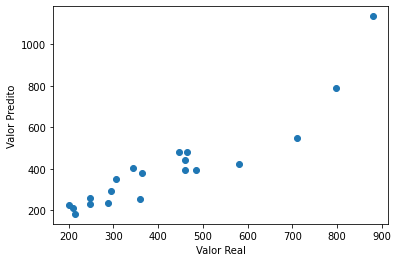

In [1754]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

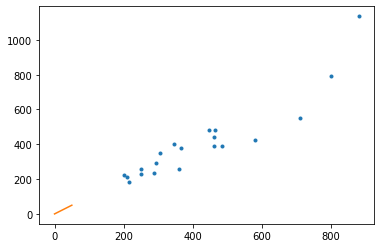

In [1755]:
y_teste_predito = lin_model.predict(X_teste)

plt.plot(Y_teste, y_teste_predito, '.')

x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y)
plt.show()

In [1756]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )


R2-score: 0.84


### Algoritmo 2

In [1757]:
#Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier  

# Definindo o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=1)  

#Treinando o modelo, com dados de treinamento
classifier.fit(X_treino, Y_treino)  

c:\users\nicolas\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [1758]:
#### Prevendo os valores de Y para os dados de teste (X_test)
y_teste_predito = classifier.predict(X_teste) 

In [1759]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

R2-score: 0.74


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | 0.84 | 0.74 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** No geral o algoritmo de Regressão Linear pareceu ser mais consistente na grande na maioria das vezes, levando em conta que a maioria dos atributos nesse caso crescem linearmente em relação ao outro, facilitando na hora de achar o valor do apartamento.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [1760]:
X_teste = [[65,2,2,1]] 

In [1668]:
y_teste_predito_r = lin_model.predict(X_teste)

In [1669]:
print(y_teste_predito_r)

[[336.59981341]]


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Acredito que sim, no fim das contas os valores resultados nos testes parecem ser consistentes com os atributos que foram utilizados.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Talvez poderia ter alguns outros atributos como opções da lazer no condomínio (se tem piscina, quadra de esportes, etc), por exemplo, assim chegando num valor ainda mais preciso.